# Set Membership

The cell below defines two **abstract classes**: the first represents a set and basic insert/search operations on it. You will need to impement this API four times, to implement (1) sequential search, (2) binary search tree, (3) balanced search tree, and (4) bloom filter. The second defines the synthetic data generator you will need to implement as part of your experimental framework. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [13]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

# abstract class to represent a set and its insert/search operations
class AbstractSet(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # inserts "element" in the set
    # returns "True" after successful insertion, "False" if the element is already in the set
    # element : str
    # inserted : bool
    @abstractmethod
    def insertElement(self, element):     
        inserted = False
        return inserted   
    
    # checks whether "element" is in the set
    # returns "True" if it is, "False" otherwise
    # element : str
    # found : bool
    @abstractmethod
    def searchElement(self, element):
        found = False
        return found    
    
    
    
# abstract class to represent a synthetic data generator
class AbstractTestDataGenerator(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # creates and returns a list of length "size" of strings
    # size : int
    # data : list<str>
    @abstractmethod
    def generateData(self, size):     
        data = [""]*size
        return data   


Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [14]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE

# BST helper code:
class NodeBST():    # The helper class for BST
    def __init__(self, value):
        self.value = value
        self.right_node=None
        self.left_node  = None
      
    def insert(self, value): 
        if value > self.value and self.right_node: 
            return self.right_node.insert(value)
        elif value < self.value and self.left_node:
            return self.left_node.insert(value)
        elif value > self.value:
            self.right_node = NodeBST(value)
            return True
        elif value < self.value:
            self.left_node = NodeBST(value)
            return True
        return False
      
    def search(self, value):
        if value > self.value and self.right_node:
            return self.right_node.search(value)
        elif value < self.value and self.left_node:
            return self.left_node.search(value)
        
        elif (value == self.value):
            return True
        else:
            return False
    
    def print_tree(self):  # prints from left to right
        
        print(self.value)
        
        if self.left_node:
            self.left_node.print_tree()
            
        if self.right_node:
            self.right_node.print_tree()

In [15]:
# Balanced Tree helper code

class BalancedNode:
    def __init__(self, value):
        self.left = None
        self.parent = None
        self.right = None
        self.value = value
        self.colour = "R"



In [16]:
#Linked list implementation of sequential search

class Node_linked_list:
    def __init__(self, data=None, next=None): 
        self.data = data
        self.next = next

class SequentialSearchSetLinkedList(AbstractSet):
    def __init__(self):
        self.head = None

    
    def insertElement(self, element):
        if self.head is None:
            self.head = Node_linked_list(element, None)
            return
            
        
        node = self.head
        while node.next is not None:
            node = node.next
        
        node.next = Node_linked_list(element, None)


    def searchElement(self, element):
        search_node = self.head
        while search_node is not None:
            if search_node.data == element:
                return True
            search_node = search_node.next
        return False
    


Use the cell below to implement the requested API by means of **sequential search**.

In [17]:
class SequentialSearchSet(AbstractSet):
    
    def __init__(self):
        self.words = []
                
    def insertElement(self, element):
        inserted = False
        for value in self.words:
            if value == element:
                return inserted
        self.words.append(element)
        inserted = True
      
        return inserted
    

    def searchElement(self, element):
        
        found = False
        for value in self.words:
            if value == element:
                found = True
                return found
        
        return found

Use the cell below to implement the requested API by means of **binary search tree**.

In [18]:
# Wrapper class for the binary search tree 

class BinarySearchTreeSet(AbstractSet):
    
    def __init__(self):
        self.root = NodeBST("0")
        
    def insertElement(self, element):
        inserted = False
        inserted = self.root.insert(element)
        return inserted

    def searchElement(self, element):     
        found = False
        found = self.root.search(element)
        return found    

Use the cell below to implement the requested API by means of **balanced search tree**.

In [19]:

class BalancedSearchTreeSet(AbstractSet):
    def __init__(self): # code to initialize the tree structure 
        self.empty = BalancedNode("")
        self.empty.colour = "B"
        self.empty.left = None
        self.empty.right = None
        self.root = self.empty
        

    def insertElement(self, element): 
        # This function adds the node to be inserted like a binary tree
        # It gives it the initial colour of red, but if it is the root it changes the colour to black
        # Returns inserted if no further operations are needed (best case scenario), otherwise calls another function
        inserted = False
        node = BalancedNode(element)
        node.parent = None
        node.value = element
        node.colour = "R"
        node.left = self.empty
        node.right = self.empty

        tempval = None
        rt = self.root

        check = self.searchElement(element)
        if check==True:
            inserted = False
            return inserted

        while rt != self.empty:
            tempval = rt
            if node.value < rt.value:
                rt = rt.left
            else:
                rt = rt.right

        node.parent = tempval

        if tempval == None:
            self.root = node
        elif node.value < tempval.value:
            tempval.left = node
        else:
            tempval.right = node

        if node.parent == None:
            node.colour = "B"
            inserted = True
            return inserted

        if node.parent.parent == None:
            inserted = True
            return inserted

        self.insertcontinue(node)
        return inserted

    def search(self, node, value):
        # Searches similarly to a binary tree
        found = False
        if node == self.empty:
            return found
        elif value == node.value:
            found = True
            return found
        if value < node.value:
            return self.search(node.left, value)
        return self.search(node.right, value)

    def leftrotate(self, rotateval):
        # Rotates the tree to the left around a particular node
        rchild = rotateval.right
        rotateval.right = rchild.left
        if rchild.left != self.empty:
            rchild.left.parent = rotateval
        rchild.parent = rotateval.parent
        if rotateval.parent == None:
            self.root = rchild
        elif rotateval == rotateval.parent.left:
            rotateval.parent.left = rchild
        else:
            rotateval.parent.right = rchild
        rchild.left = rotateval
        rotateval.parent = rchild

    def rightrotate(self, rotateval):
        # Rotates the tree to the right around a particular node
        lchild = rotateval.left
        rotateval.left = lchild.right
        if lchild.right != self.empty:
            lchild.right.parent = rotateval
        lchild.parent = rotateval.parent
        if rotateval.parent == None:
            self.root = lchild
        elif rotateval == rotateval.parent.right:
            rotateval.parent.right = lchild
        else:
            rotateval.parent.left = lchild
        lchild.right = rotateval
        rotateval.parent = lchild

    def colourswap(self, a, l):
        # If called, this changes the colour of the grandparent of the node being colourswapped to RED
        # It also changes the colour of the aunt and the parent to BLACK
        if a.colour == "R":
            a.colour = "B"
            l.parent.colour = "B"
            l.parent.parent.colour = "R"
            l = l.parent.parent

    def insertcontinue(self, leaf):
        # This function is only called if there are 2 red nodes adjacent to one another
        # It then locates the aunt, and depending on the aunts colour it performs actions to self-balance itself
        while leaf.parent.colour == "R":
            if leaf.parent == leaf.parent.parent.right:
                # This line differentiates the left and right subtrees of the main root
                aunt = leaf.parent.parent.left
                if aunt.colour == "R":
                    # If the aunt is red, a colourswap is conducted
                    self.colourswap(aunt, leaf)
                    leaf = leaf.parent.parent
                else:
                    #Otherwise, a right-left rotation is conducted
                    if leaf == leaf.parent.left:
                        leaf = leaf.parent
                        self.rightrotate(leaf)
                    leaf.parent.colour = "B"
                    leaf.parent.parent.colour = "R"
                    self.leftrotate(leaf.parent.parent)
            else:
                # This section operates with the right subtree of the main root
                aunt = leaf.parent.parent.right
                if aunt.colour == "R":
                    self.colourswap(aunt, leaf)
                    leaf = leaf.parent.parent
                else:
                    # If the aunt is black, then a left-right rotation is conducted
                    if leaf == leaf.parent.right:
                        leaf = leaf.parent
                        self.leftrotate(leaf)
                    leaf.parent.colour = "B"
                    leaf.parent.parent.colour = "R"
                    self.rightrotate(leaf.parent.parent)
            if leaf == self.root:
                break
            self.root.colour = "B"

           

    def searchElement(self, element):
        #This initializes the search function from the root
        return self.search(self.root, element)




Use the cell below to implement the requested API by means of **bloom filter**.

In [20]:
class BloomFilterSet(AbstractSet):
    
    def __init__(self):
        self.size = 100000000
        self.hash_count = 5
        self.bit_array = [0] * self.size
        self.hash_functions = self.generate_hash_functions()
    
    def generate_hash_functions(self): # Code to generate a list of unique hash functions
            hash_fuctions = []
            for i in range(1,self.hash_count+1):
                hash_fuctions.append(self.generate_hash_function(i))
            return hash_fuctions
    
    def generate_hash_function(self,seed): # Code to generate a unique hash function based on an inputed seed value
        def hash_function(value):
            return (hash(value + str(seed)) % self.size)
        return hash_function
        
    def insertElement(self, element):
        inserted = False
        for hash_function in self.hash_functions:
            if self.bit_array[hash_function(element)] == 0:
                self.bit_array[hash_function(element)] = 1
                inserted = True
            else:
                self.bit_array[hash_function(element)] = 1
        
        return inserted

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE
        for hash_function in self.hash_functions:
            if self.bit_array[hash_function(element)] == 0:
                return found
        found = True
        return found    

Use the cell below to implement the **synthetic data generator** as part of your experimental framework.

In [21]:
import string
import random

class TestDataGenerator(AbstractTestDataGenerator):
    
    def __init__(self, punctuation=False, length=7, lower=True, upper=True, digits=True):
        self.length = length
        self.lower = lower
        self.upper = upper
        self.digits = digits
        self.punctuation = punctuation

    def getCharacters(self):
        character = ''
        if self.lower:
            character += string.ascii_lowercase
        if self.upper:
            character += string.ascii_uppercase
        if self.digits:
            character += string.digits
        if self.punctuation:
            character += string.punctuation

        return character

        
    def generateData(self, size):     # random string generator, size defines the amount of data that is going to be generated
        data = []
        characters = self.getCharacters()

        for i in range(size):
            data.append(''.join(random.choices(characters, k=random.randint(3,self.length))))
        
        return data
    
    def generateSorted(self, size):     # this is the worst case scenario for BST and balanced, as it creates linear tree for BST and most operations for balanced
        return sorted(self.generateData(size))
    
    def generateReverseSorted(self, size):  
        return sorted(self.generateData(size), reverse=True) 
    
    def generateBestCaseBinary(self, size):
        class Node:
            def __init__(self, value):
                self.value = value
                self.left = None
                self.right = None

        class Queue:    # Queue API, needed to use breadth-first-search to generate median sorted data, which needs queue in the beginning.
            def __init__(self):
                self.items = []

            def is_empty(self):
                return len(self.items) == 0

            def enqueue(self, item):
                self.items.append(item)

            def dequeue(self):
                return self.items.pop(0)

        def build_balanced_bst(strings): #Builds the BST from the sorted strings so that it will be perfectly balanced, uses binary-search like approach
            if not strings:
                return None
            
            mid = len(strings) // 2
            root = Node(strings[mid])
            root.left = build_balanced_bst(strings[:mid])
            root.right = build_balanced_bst(strings[mid+1:])
            return root

        def generate_balanced_bst_data():   #With the usage of breadth-first-search, scans the tree layer by layer and then outputs median sorted data.
            result = []
            root = build_balanced_bst(self.generateSorted(size))

            # Output BST layer by layer
            queue = Queue()
            queue.enqueue(root)
            current_level = 1
            next_level = 0
            while not queue.is_empty():
                node = queue.dequeue()
                result.append(node.value)
                current_level -= 1
                
                if node.left:
                    queue.enqueue(node.left)
                    next_level += 1
                if node.right:
                    queue.enqueue(node.right)
                    next_level += 1
                
                if current_level == 0:
                    current_level = next_level
                    next_level = 0
            return result

        return generate_balanced_bst_data()
    
    def generateDuplicateData(self, size):
        values = self.generateData(10)
        data = []
        for count in range(size):
            randvalue = random.randint(0,9)
            data.append(values[randvalue])
        
        return data

Use the cells below for the python code needed to **fully evaluate your implementations**, first on real data and subsequently on synthetic data (i.e., read data from test files / generate synthetic one, instantiate each of the 4 set implementations in turn, then thorouhgly experiment with insert/search operations and measure their performance).

In [22]:
import timeit

# ADD YOUR TEST CODE HERE TO WORK ON REAL DATA
iterations= 1

datastuctures = {"bloomfilter": BloomFilterSet,"bst": BinarySearchTreeSet, "balanced_tree": BalancedSearchTreeSet, "seq_search":SequentialSearchSet}
created_dst={}

def insert(key, file):
    data_structure = datastuctures[key]()
    for line in file:
        for word in line.split():
            data_structure.insertElement(word)
    created_dst[key] = data_structure

def search(key, file):
        for word in file:
            dst = created_dst[key]
            word = word.strip()
            if (dst.searchElement(word)):
                pass
            else:
                pass

def test():
    for key in datastuctures:
        with open("./testfiles/test1-mobydick.txt", "r") as file:    #Testing search and insert on file 1
            time= timeit.timeit(lambda: insert(key, file), number=iterations)
            print("Inserting file 1 into " + key + " took " + str(time/iterations) + " seconds")
        with open("./testfiles/test-search.txt", "r") as file:
            time = timeit.timeit(lambda: search(key, file), number=iterations)
            print("Searching file 1 in " + key + " took " + str(time/iterations) + " seconds")
        print("____________________________________________________")
    for key in datastuctures:
        with open("./testfiles/test2-warpeace.txt", "r") as file:   #Testing search and insert on file 2
                time = timeit.timeit(lambda: insert(key, file), number=iterations)
                print("Inserting file 2 into " + key + " took " + str(time/iterations) + " seconds")
        with open("./testfiles/test-search.txt", "r") as file:
                time = timeit.timeit(lambda: search(key, file), number=iterations)
                print("Searching file 2 in " + key + " took " + str(time/iterations) + " seconds")
        print("____________________________________________________")
    for key in datastuctures:
        with open("./testfiles/test3-dickens.txt", "r") as file:     #Testing search and insert on file 3
                time = timeit.timeit(lambda: insert(key, file), number=iterations)
                print("Inserting file 3 into " + key + " took " + str(time/iterations) + " seconds")
        with open("./testfiles/test-search.txt", "r") as file:
                time = timeit.timeit(lambda: search(key, file), number=iterations)
                print("Searching file 3 in " + key + " took " + str(time/iterations) + " seconds")
        print("____________________________________________________")
test()

Inserting file 1 into bloomfilter took 1.1139272000000346 seconds
Searching file 1 in bloomfilter took 0.0015623999934177846 seconds
____________________________________________________
Inserting file 1 into bst took 0.4572900000202935 seconds
Searching file 1 in bst took 0.002203300013206899 seconds
____________________________________________________
Inserting file 1 into balanced_tree took 0.5855597999761812 seconds
Searching file 1 in balanced_tree took 0.0013795999984722584 seconds
____________________________________________________


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
def graph(data, title,start,stop,step):
    plt.title(title)
    plt.xlabel("size of input")
    plt.ylabel("time in seconds")
    for key in data:
        plt.plot([i for i in range(start,stop, step)], data[key], label=key)
        plt.scatter([i for i in range(start,stop, step)], data[key] , label=key)
    plt.legend()
    plt.show()

____________________________________________________
Inserting strings of size 100 into bloomfilter took 0.09625399997457862 seconds
Searching strings of size 100 into bloomfilter took 2.13750172406435e-06 seconds
____________________________________________________
Inserting strings of size 100 into balanced_tree took 0.0004036249592900276 seconds
Searching strings of size 100 into balanced_tree took 1.60830095410347e-06 seconds
____________________________________________________
Inserting strings of size 100 into bst took 0.0005902079865336418 seconds
Searching strings of size 100 into bst took 1.2091593816876411e-05 seconds
____________________________________________________
Inserting strings of size 150 into bloomfilter took 0.09567304095253348 seconds
Searching strings of size 150 into bloomfilter took 1.3584038242697716e-06 seconds
____________________________________________________
Inserting strings of size 150 into balanced_tree took 0.000507500022649765 seconds
Searching st

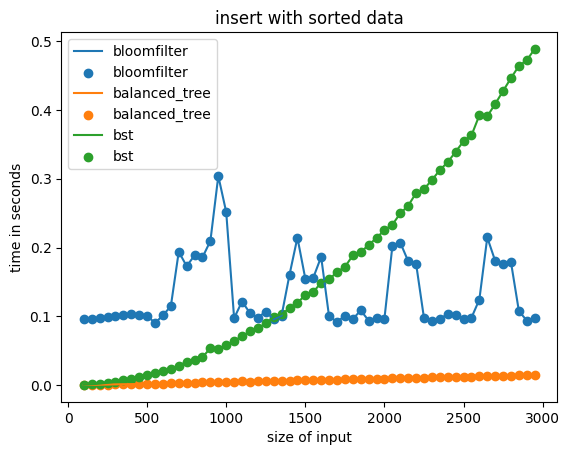

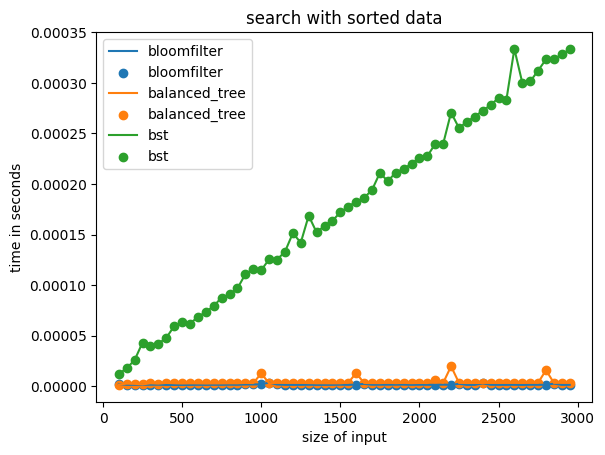

Inserting strings of size 100 into bloomfilter took 0.0960611670743674 seconds
Searching strings of size 100 into bloomfilter took 1.924997195601463e-06 seconds
____________________________________________________
Inserting strings of size 100 into balanced_tree took 0.00034866598434746265 seconds
Searching strings of size 100 into balanced_tree took 1.5667174011468887e-06 seconds
____________________________________________________
Inserting strings of size 100 into bst took 0.0009045000188052654 seconds
Searching strings of size 100 into bst took 2.3412494920194148e-05 seconds
____________________________________________________
Inserting strings of size 150 into bloomfilter took 0.10080233286134899 seconds
Searching strings of size 150 into bloomfilter took 1.433398574590683e-06 seconds
____________________________________________________
Inserting strings of size 150 into balanced_tree took 0.0005181250162422657 seconds
Searching strings of size 150 into balanced_tree took 1.700012

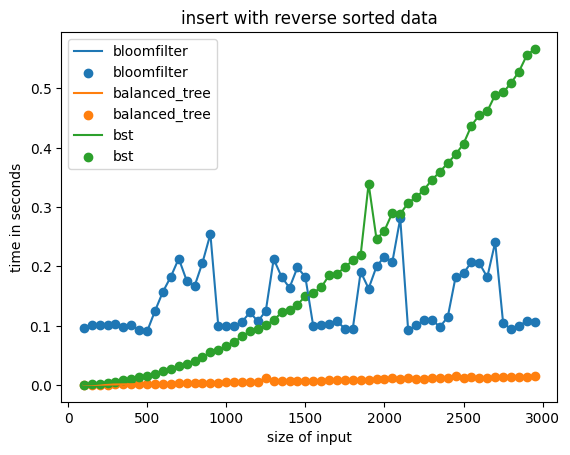

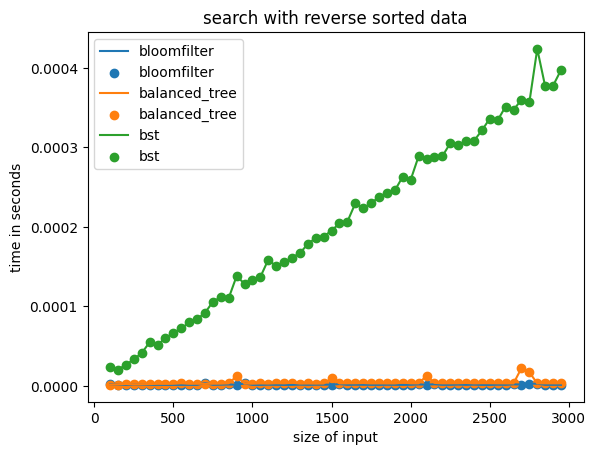

Inserting strings of size 100 into bloomfilter took 0.09138058288954198 seconds
Searching strings of size 100 into bloomfilter took 1.4916062355041503e-06 seconds
____________________________________________________
Inserting strings of size 100 into balanced_tree took 0.00020754197612404823 seconds
Searching strings of size 100 into balanced_tree took 1.1041993275284767e-06 seconds
____________________________________________________
Inserting strings of size 100 into bst took 0.0003129581455141306 seconds
Searching strings of size 100 into bst took 2.374988980591297e-06 seconds
____________________________________________________
Inserting strings of size 150 into bloomfilter took 0.09502954198978841 seconds
Searching strings of size 150 into bloomfilter took 1.3415934517979623e-06 seconds
____________________________________________________
Inserting strings of size 150 into balanced_tree took 0.0003148331306874752 seconds
Searching strings of size 150 into balanced_tree took 1.0875

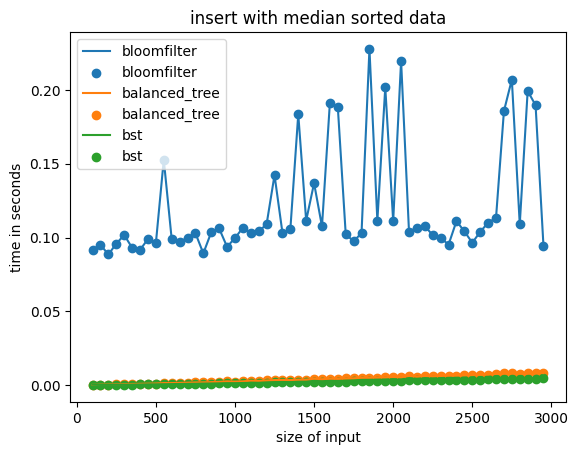

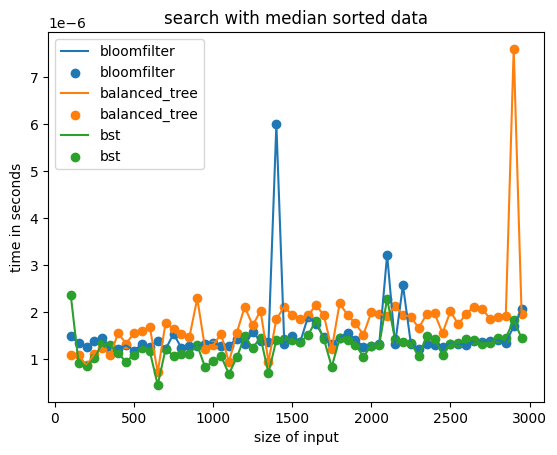

In [ ]:
import timeit

# ADD YOUR TEST CODE HERE TO WORK ON SYNTHETIC DATA
import random
iterations= 1
data_generator = TestDataGenerator(length=5)
datastuctures = {"bloomfilter": BloomFilterSet, "balanced_tree": BalancedSearchTreeSet, "bst": BinarySearchTreeSet, "seq_search":SequentialSearchSet}
test_type = {"unsorted":data_generator.generateData, "sorted":data_generator.generateSorted  ,"median": data_generator.generateBestCaseBinary, "rev_sorted": data_generator.generateReverseSorted}
created_dst={}
count = 3000
step =50

def insert(key, list):    #Inserting data into data structure
    data_structure = datastuctures[key]()
    for word in list:
            data_structure.insertElement(word)
    created_dst[key] = data_structure

def search(key, list):   #Searching data in data structure
    for word in list:
        dst = created_dst[key]
        if (dst.searchElement(word)):
            pass
        else:
            pass

def test_unsorted():   #Testing random data
    times_insert={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    times_search={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    for i in range(1000,count, step):
        list = data_generator.generateData(i)
        search_list = list.copy()
        random.shuffle(search_list)
        search_word = search_list[0]
        for key in datastuctures:
            insertion_time = timeit.timeit(lambda: insert(key, list), number=iterations)
            times_insert[key].append(insertion_time/(iterations))
            print("Inserting strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
            search_time = timeit.timeit(lambda: created_dst[key].searchElement(search_word), number=10)
            print("Searching strings of size " + str(i) + " into " + key + " took " + str(search_time/10) + " seconds")
            times_search[key].append(search_time/(10))
            print("____________________________________________________")
    graph(times_insert, "insert with unsorted data",1000,count,step)
    graph(times_search, "search with unsorted data",1000, count, step)
test_unsorted()      
print("____________________________________________________")


def test_sorted():  #Testing sorted data
    times_insert={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    times_search={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    for i in range(100,count, step):
        list = data_generator.generateSorted(i)
        search_list = list.copy()
        random.shuffle(search_list)
        search_word = list[len(search_list)-1]
        for key in datastuctures:
            insertion_time = timeit.timeit(lambda: insert(key, list), number=iterations)
            times_insert[key].append(insertion_time/iterations)
            print("Inserting strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
            search_time = timeit.timeit(lambda: created_dst[key].searchElement(search_word), number=10)
            print("Searching strings of size " + str(i) + " into " + key + " took " + str(search_time/10) + " seconds")
            times_search[key].append(search_time/10)
            print("____________________________________________________")
    print(times_insert, times_search)
    graph(times_insert, "insert with sorted data",100,count, step)
    graph(times_search, "search with sorted data",100,count, step)
test_sorted()
print("____________________________________________________")

def test_reverse_sorted(): #Testing reverse sorted data
    times_insert={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    times_search={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    for i in range(100,count, step):
        list = data_generator.generateReverseSorted(i)
        search_list = list.copy()
        random.shuffle(search_list)
        search_word = list[len(search_list)-1]
        for key in datastuctures:
            insertion_time = timeit.timeit(lambda: insert(key, list), number=iterations)
            times_insert[key].append(insertion_time/iterations)
            print("Inserting strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
            search_time = timeit.timeit(lambda: created_dst[key].searchElement(search_word), number=10)
            print("Searching strings of size " + str(i) + " into " + key + " took " + str(search_time/10) + " seconds")
            times_search[key].append(search_time/10)
            print("____________________________________________________")
    graph(times_insert, "insert with reverse sorted data",100,count, step)
    graph(times_search, "search with reverse sorted data",100,count, step)
test_reverse_sorted()
print("____________________________________________________")

def test_median_binary(): #Testing median binary data(best binary tree data)
    times_insert={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    times_search={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    for i in range(100,count, step):
        list = data_generator.generateBestCaseBinary(i)
        search_list = list.copy()
        random.shuffle(search_list)
        search_word = search_list[len(search_list)//2]
        for key in datastuctures:
            insertion_time = timeit.timeit(lambda: insert(key, list), number=iterations)
            times_insert[key].append(insertion_time/iterations)
            print("Inserting strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
            search_time = timeit.timeit(lambda: created_dst[key].searchElement(search_word), number=10)
            print("Searching strings of size " + str(i) + " into " + key + " took " + str(search_time/10) + " seconds")
            times_search[key].append(search_time/10)
            print("____________________________________________________")
    graph(times_insert, "insert with median sorted data",100,count, step)
    graph(times_search, "search with median sorted data",100,count, step)
test_median_binary()
print("____________________________________________________")

def test_duplicates():  #Testing duplicate data
    times_insert={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    times_search={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    for i in range(100,count, step):
        list = data_generator.generateDuplicateData(i)
        search_list = list.copy()
        random.shuffle(search_list)
        for key in datastuctures:
            insertion_time = timeit.timeit(lambda: insert(key, list), number=iterations)
            times_insert[key].append(insertion_time/iterations)
            print("Inserting strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
            search_time = timeit.timeit(lambda: search(key, search_list), number=iterations)
            print("Searching strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
            times_search[key].append(search_time/iterations)
            print("____________________________________________________")
    graph(times_insert, "insert with duplicates data",100,count, step)
    graph(times_search, "search with duplicates data",100,count, step)
test_duplicates()
print("____________________________________________________")

def test_per_dst():  #Testing all data types for each data structure
    for key in datastuctures:
        times_insert={"unsorted":[], "sorted":[]  ,"median": [], "rev_sorted":[]}
        times_search={"unsorted":[], "sorted":[]  ,"median": [], "rev_sorted":[]}
        for i in range(10,count, step):
            for test in test_type:
                list = test_type[test](i)
                search_list = list.copy()
                random.shuffle(search_list)
                insertion_time = timeit.timeit(lambda: insert(key, list), number=iterations)
                times_insert[test].append(insertion_time/iterations)
                print("Inserting " + str(test)+ " strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
                search_time = timeit.timeit(lambda: search(key, search_list), number=iterations)
                print("Searching " + str(test)+ " strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
                times_search[test].append(search_time/iterations)
                print("____________________________________________________")
        graph(times_insert, "insert with "+ str(key),100,count,step)
        graph(times_search, "search with  "+ str(key),100,count,step)
test_per_dst()

In [ ]:
def insert(data_structure, list):
    for word in list:
            data_structure.insertElement(word)

def search(dst, list):
    for word in list:
        if (dst.searchElement(word)):
            pass
        else:
            pass

class BloomFilterSettest(AbstractSet):
    
    def __init__(self,hash_count,size):
        # ADD YOUR CODE HERE
        self.size = size
        self.hash_count = hash_count
        self.bit_array = [0] * self.size
        self.hash_functions = self.generate_hash_functions()
    
    def generate_hash_functions(self): # Code to generate a list of unique hash functions
            hash_fuctions = []
            for i in range(1,self.hash_count+1):
                hash_fuctions.append(self.generate_hash_function(i))
            return hash_fuctions
    
    def generate_hash_function(self,seed): # Code to generate a unique hash function based on an inputed seed value
        def hash_function(value):
            return hash(value + str(seed)) % self.size
        return hash_function
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
        for hash_function in self.hash_functions:
            self.bit_array[hash_function(element)] = 1
        inserted = True
        
        return inserted

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE
        for hash_function in self.hash_functions:
            if self.bit_array[hash_function(element)] == 0:
                return found
        found = True
        return found    

Inserting into bloom filter of size 10000 took 0.00036937487311661243 seconds
Searching into bloom filter of size 10000 took 6.00004568696022e-07 seconds
____________________________________________________
Inserting into bloom filter of size 20000 took 0.0003383748698979616 seconds
Searching into bloom filter of size 20000 took 4.2079482227563857e-07 seconds
____________________________________________________
Inserting into bloom filter of size 30000 took 0.0003383331932127476 seconds
Searching into bloom filter of size 30000 took 3.95788811147213e-07 seconds
____________________________________________________
Inserting into bloom filter of size 40000 took 0.00033487495966255665 seconds
Searching into bloom filter of size 40000 took 3.9169099181890487e-07 seconds
____________________________________________________
Inserting into bloom filter of size 50000 took 0.00034775002859532833 seconds
Searching into bloom filter of size 50000 took 4.292000085115433e-07 seconds
_______________

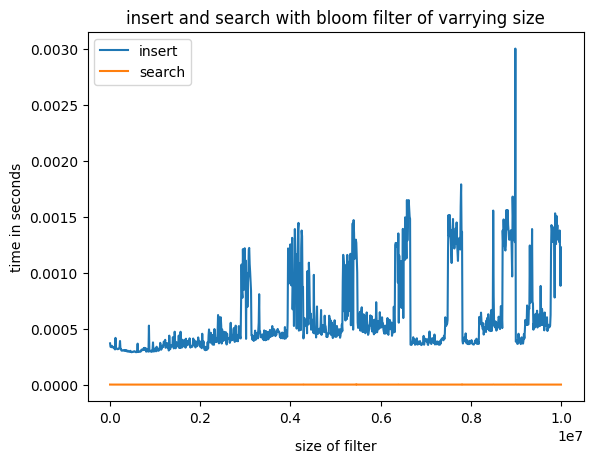

Inserting into bloom filter with 1 hashes  took 0.0002872080076485872 seconds
Searching into bloom filter with 1 hashes  took 0.00030372499022632835 seconds
____________________________________________________
Inserting into bloom filter with 101 hashes  took 0.02064729086123407 seconds
Searching into bloom filter with 101 hashes  took 0.021737762494012713 seconds
____________________________________________________
Inserting into bloom filter with 201 hashes  took 0.04057466587983072 seconds
Searching into bloom filter with 201 hashes  took 0.04234972500707954 seconds
____________________________________________________
Inserting into bloom filter with 301 hashes  took 0.0596474998164922 seconds
Searching into bloom filter with 301 hashes  took 0.06212574578821659 seconds
____________________________________________________
Inserting into bloom filter with 401 hashes  took 0.07904166588559747 seconds
Searching into bloom filter with 401 hashes  took 0.08310957089997828 seconds
_______

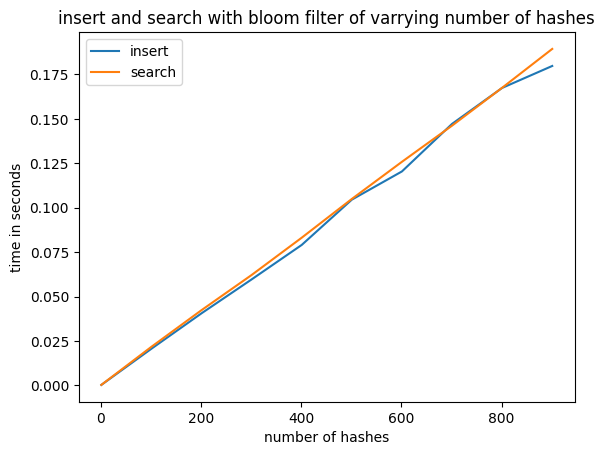

In [ ]:
import timeit
import matplotlib.pyplot as plt
import random
data_size = 1000
count = data_size
iterations = 1

def test_bloom_size():  #Testing peroformance of bloom filter with different sizes
    data_generator= TestDataGenerator()
    sizes = [str(i) for i in range(10000,10000000,10000)]
    times_insert=[]
    times_search=[]
    list = data_generator.generateData(1000)
    search_list = list.copy()
    random.shuffle(search_list)
    search_word = search_list[0]
    for size in sizes:
        bf = BloomFilterSettest(1,int(size))
        insert_time = timeit.timeit(lambda: insert(bf, list), number=iterations)
        times_insert.append(insert_time/iterations)
        print("Inserting into bloom filter of size " + size + " took " + str(insert_time/iterations) + " seconds")
        search_time = timeit.timeit(lambda: bf.searchElement(search_word), number=10)
        print("Searching into bloom filter of size " + size + " took " + str(search_time/10) + " seconds")
        times_search.append(search_time/10)
        print("____________________________________________________")
    plt.title("insert and search with bloom filter of varrying size")
    plt.xlabel("size of filter", labelpad=10)
    plt.ylabel("time in seconds")
    plt.plot([int(i) for i in sizes], times_insert, label="insert")
    plt.plot([int(i) for i in sizes], times_search, label="search")
    plt.legend()
    plt.show()

    
def test_bloom_hashes(): #Testing performance of bloom filter with different number of hash functions
    data_generator= TestDataGenerator()
    number = [str(i) for i in range(1,1000,100)]
    times_insert=[]
    times_search=[]
    list = data_generator.generateData(1000)
    search_list = list.copy()
    random.shuffle(search_list)
    for size in number:
        bf = BloomFilterSettest(int(size), 100000)
        insert_time = timeit.timeit(lambda: insert(bf, list), number=iterations)
        times_insert.append(insert_time/iterations)
        print("Inserting into bloom filter with " + size + " hashes "+" took " + str(insert_time/iterations) + " seconds")
        search_time = timeit.timeit(lambda: search(bf,search_list), number=10)
        print("Searching into bloom filter with " + size + " hashes "+" took " + str(search_time/10) + " seconds")
        times_search.append(search_time/10)
        print("____________________________________________________")
    plt.title("insert and search with bloom filter of varrying number of hashes")
    plt.xlabel("number of hashes")
    plt.ylabel("time in seconds")
    plt.plot([int(i) for i in number], times_insert, label="insert")
    plt.plot([int(i) for i in number], times_search, label= "search")
    plt.legend()
    plt.show()
    
  
    
    
    
test_bloom_size()
test_bloom_hashes()